In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
cd ../src/

/workspace/kaggle_rsna_lumbar_spine/src


In [20]:
# !pip install -qU python-gdcm pydicom pylibjpeg

In [21]:
import os
import cv2
import glob
import gdcm
import pydicom
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from tqdm.notebook import tqdm
from joblib import Parallel, delayed

In [22]:
DATA_PATH = "../input/train_images/"

print('Number of training patients :', len(os.listdir(DATA_PATH)))

Number of training patients : 1975


In [23]:
df = pd.read_csv('../input/train_series_descriptions.csv')
df["orient"] = df["series_description"].apply(lambda x: x.split()[0])
df["weighting"] = df["series_description"].apply(lambda x: x.split()[1])

In [24]:
SAVE_FOLDER = "../input/npy2/"
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [14]:
from data.processing import process_2

def process_and_save(study, series, orient, data_path, save_folder=""):
    imgs, df_series = process_2(int(study), int(series), orient, data_path=data_path)

    if save_folder:
        np.save(save_folder + f"{study}_{series}.npy", imgs)

    return {
        "study_id": study,
        "series_id": series,
        "frames": df_series.instance_number.values.tolist(),
    }

In [15]:
offsets = Parallel(n_jobs=16)(
    delayed(process_and_save)(
        df['study_id'][i],
        df['series_id'][i],
        df['orient'][i],
        DATA_PATH,
        SAVE_FOLDER
    ) for i in tqdm(range(len(df)))
)

  0%|          | 0/6294 [00:00<?, ?it/s]

In [16]:
df_frames = pd.DataFrame(offsets)
df_frames.to_csv('../input/df_frames.csv', index=False)

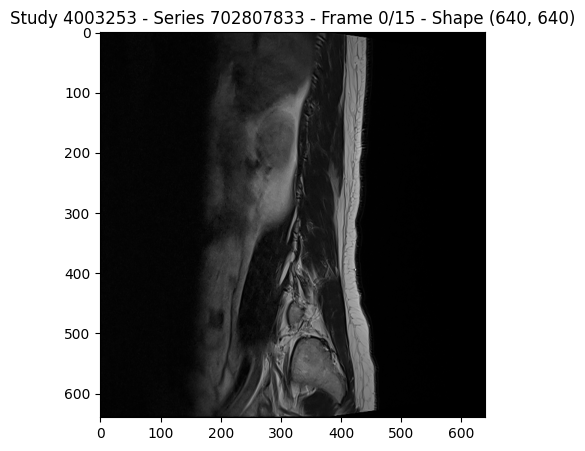

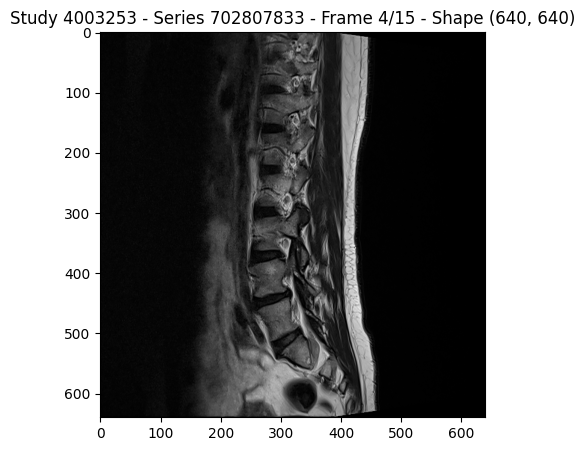

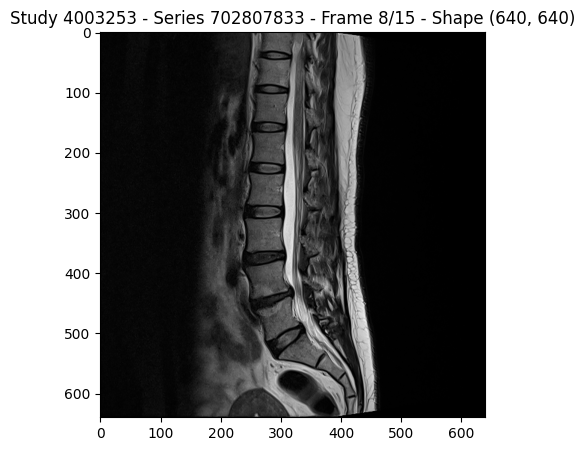

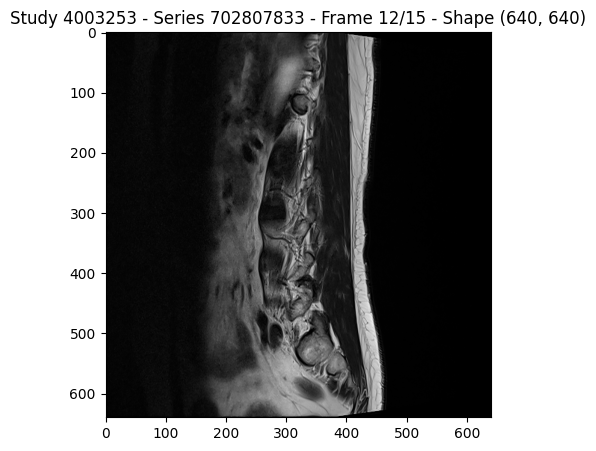

In [17]:
for i in range(3):
    study = df['study_id'][i]
    series = df['series_id'][i]

    imgs = np.load(SAVE_FOLDER + f"{study}_{series}.npy")

    for i in range(len(imgs)):
        img = imgs[i]
        if not (i % (len(imgs) // 5 + 1)):
        # if i > 40:
            plt.figure(figsize=(5, 5))
            plt.imshow(img, cmap="gray")
            plt.title(
                f"Study {study} - Series {series} - Frame {i}/{len(imgs)} - Shape {img.shape}"
            )
            plt.show()

    # break

    break

Done ! 